This notebook has the purpose of comparing tidal ellipses calculated by the model to other data sources.

#Loading and Preparing the Files

The following cells in this section will load, mask, rotate and unstagger the model output data. 

In [1]:
import os
import glob
import datetime
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Ellipse
import numpy as np
from IPython.display import display, Math, Latex
import datetime
import pandas as pd
import seaborn as sn

import netCDF4 as nc
from scipy.optimize import curve_fit
from salishsea_tools import (viz_tools, tidetools, nc_tools)
from salishsea_tools.nowcast import (research_VENUS, analyze)

%matplotlib inline

In [2]:
grid_B = nc.Dataset('/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
lats = grid_B.variables['nav_lat'][:]
lons = grid_B.variables['nav_lon'][:]
bathy = grid_B.variables['Bathymetry'][:,:]

In [3]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 7, 13)

t_o = to.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()

runname1 = '{}_{}_Central'.format(t_o, t_f)
runname2 = '{}_{}_East'.format(t_o, t_f)


cols=np.arange(0,9)

df1 = pd.read_csv('TidalEllipseData/Nodes/'+runname1+'.csv', usecols=cols) 
df2 = pd.read_csv('TidalEllipseData/Nodes/'+runname2+'.csv', usecols=cols)

cen = df1.as_matrix()
east = df2.as_matrix()

In [4]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 7, 13)

t_o = to.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()

runname1 = '{}_{}_Central_depav'.format(t_o, t_f)
runname2 = '{}_{}_East_depav'.format(t_o, t_f)

#Only importing M2 parameters
cols=np.arange(0,1)

df1 = pd.read_csv('TidalEllipseData/Nodes/'+runname1+'.csv', index_col=False) 
df2 = pd.read_csv('TidalEllipseData/Nodes/'+runname2+'.csv', index_col=False)

cen_av = df1.as_matrix()
east_av = df2.as_matrix()

The locations of the nodes are stored in a dictionary in research_VENUS.py

Slice in order to compare, the min and max depth values for each location is determine by the comparison source.

#Fits

The following cells will calculate the cell-centered model output velocities' tidal parameters.

#Comparisons
##Depth Averaged at VENUS nodes 

Mark Halverson's values:

In [5]:
node = [[0.177, 0.006, 109, 311, 0.106, 0.007, 112, 188],[ 0.262, -0.005, 125, 320, 0.175, -0.011, 122, 220]]
#CODAR values
codar = [[0.113, 0.008, 126, 273,0.074, 0.006, 134, 131],[0.138, -0.037, 134, 282, 0.077, -0.009, 129, 187]]

The nodes were depth averaged between 35 - 290 m at the Central node and 20 - 160 m at the East node. I have done the same with the model output. Note that the node values wer averaged about 10-11 months where are the model output values were averages over 7 1/2 months (Nov 24, 2014 to July 13, 2015).

In [6]:
print "          Major-Axis   Minor-Axis     Angle       Phase"
print "            (m/s)        (m/s)     (deg ccw E)    (deg)"  
print "M2 - Central (35-290m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen_av[0,0], cen_av[0,1], cen_av[0,2], cen_av[0,3]) 
print ' Nodes      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         node[0][0], node[0][1], node[0][2], node[0][3])
print ""
print "M2 - East (20-160m)"
print ' Model      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f}  '.format( 
         east_av[0,0], east_av[0,1], east_av[0,2], east_av[0,3]) 
print ' Nodes      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         node[1][0], node[1][1], node[1][2], node[1][3])
print ""
print "K1 - Central (35-290m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen_av[0,4], cen_av[0,5], cen_av[0,6], cen_av[0,7]) 
print ' Nodes      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         node[0][4], node[0][5], node[0][6], node[0][7])
print ""
print "K1 - East (20-160m)"
print ' Model      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f}  '.format( 
         east_av[0,4], east_av[0,5], east_av[0,6], east_av[0,7]) 
print ' Nodes      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         node[1][4], node[1][5], node[1][6], node[1][7])


          Major-Axis   Minor-Axis     Angle       Phase
            (m/s)        (m/s)     (deg ccw E)    (deg)
M2 - Central (35-290m)
 Model      0.17         0.014        130          305  
 Nodes      0.18         0.006        109          311 

M2 - East (20-160m)
 Model      0.31        -0.018        137          324  
 Nodes      0.26        -0.005        125          320 

K1 - Central (35-290m)
 Model      0.07         0.004        135          184  
 Nodes      0.11         0.007        112          188 

K1 - East (20-160m)
 Model      0.15        -0.020        131          226  
 Nodes      0.17        -0.011        122          220 


The CODAR region evaluates only the currents in the first meter of the water column. These values are compared with the 0.5 m depth model outputs.

In [7]:
print "          Major-Axis   Minor-Axis     Angle       Phase"
print "            (m/s)        (m/s)     (deg ccw E)    (deg)"  
print "M2 - Central (0.5m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen[0,1], cen[0,2], cen[0,3], cen[0,4]) 
print ' CODAR      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         codar[0][0], codar[0][1], codar[0][2], codar[0][3])
print ""
print "M2 - East (0.5m)"
print ' Model      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f}  '.format( 
         east[0,1], east[0,2], east[0,3], east[0,4]) 
print ' CODAR      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         codar[1][0], codar[1][1], codar[1][2], codar[1][3])
print ""
print "K1 - Central (0.5m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen[0,5], cen[0,6], cen[0,7], cen[0,8]) 
print ' CODAR      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         codar[0][4], codar[0][5], codar[0][6], codar[0][7])
print ""
print "K1 - East (0.5m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         east[0,5], east[0,6], east[0,7], east[0,8]) 
print ' CODAR      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         codar[1][4], codar[1][5], codar[1][6], codar[1][7])

          Major-Axis   Minor-Axis     Angle       Phase
            (m/s)        (m/s)     (deg ccw E)    (deg)
M2 - Central (0.5m)
 Model      0.21        -0.081        135          317  
 CODAR      0.11         0.008        126          273 

M2 - East (0.5m)
 Model      0.42        -0.201        125          296  
 CODAR      0.14        -0.037        134          282 

K1 - Central (0.5m)
 Model      0.06        -0.000        111          187  
 CODAR      0.07         0.006        134          131 

K1 - East (0.5m)
 Model      0.08         0.007        107          191  
 CODAR      0.08        -0.009        129          187 


##Plotting ellipses

In [8]:
font = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20}
axisfont = {'family' : 'Arial',
    'weight' : 'light',
    'size'   : 16}

red is clockwise


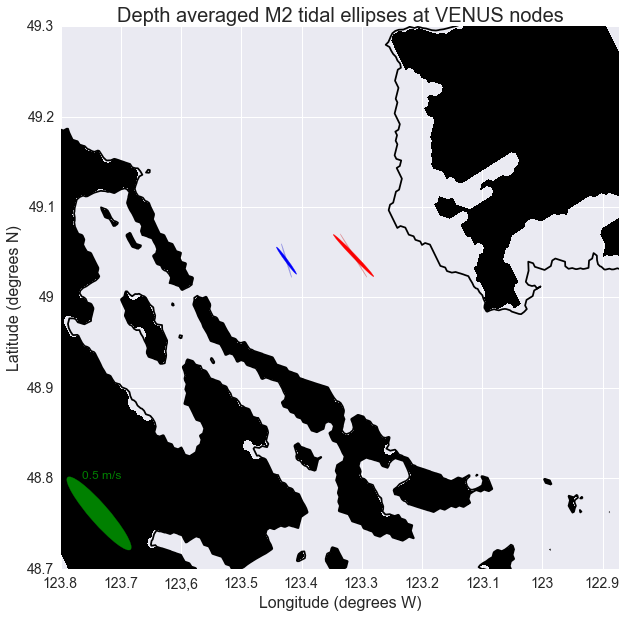

In [25]:
phi=29
k = np.zeros((898,398)); m = np.zeros((898,398))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
viz_tools.set_aspect(ax) 
ex = 90

#Inverted i and j to match code
sites = research_VENUS.SITES
ic = sites['VENUS']['Central']['i']
ie = sites['VENUS']['East']['i']
jc = sites['VENUS']['Central']['j']
je = sites['VENUS']['East']['j']


for i in np.arange(je-ex,jc+ex):
    for j in np.arange(ic-ex,ie+ex):
        k[i,j] = i*np.cos(phi*np.pi/180.)+j*np.sin(phi*np.pi/180.)
        m[i,j] = -i*np.sin(phi*np.pi/180.)+j*np.cos(phi*np.pi/180.) 
scale = 50

maj = [cen_av[0,0], node[0][0], east_av[0,0], node[1][0]]
mino = [cen_av[0,1], node[0][1], east_av[0,1], node[1][1]]
inc = [cen_av[0,2], node[0][2], east_av[0,2], node[1][2]]
loc = [(jc,ic),(jc,ic), (je,ie),(je,ie)]
intens = [1, 0.8, 1, 0.8]; opaque = [1,0.3,1,0.3]
label = ['Salish Sea Model', 'ADCP', 'd', 'sv']

for  maj, mino, inc, loc, intens, opaque, label in zip(maj, mino, inc, loc, intens, opaque, label):
    if mino > 0:
        thec = [0,0,1*intens, opaque]
    else:
        thec = [1*intens,0,0, opaque]
    ellsc = Ellipse(xy=(m[loc],k[loc]), width=scale*maj, 
                        height=scale*mino, angle=inc,
                        color=thec)
    ax.add_artist(ellsc)
    ellsc.set_facecolor(thec)

ell = Ellipse(xy=(m[395,190],k[395,190]),width = scale*0.5, height = scale*0.1, angle = -45,
              color='g')
ax.add_artist(ell)
textscale = ax.text(m[405,190],k[405,190], '0.5 m/s', color='g', fontsize=12)
# y-axis in k, but labelled in latitude
ax.set_ylim(480,490)
slope = (lats[jc,ic]-lats[je,ic])/(k[jc,ic]-k[je,ic])
mylist = (k[je,ic]+(np.arange(48.7, 49.35, 0.1)-
                           lats[je,ic])/slope).tolist()
labels = ['48.7','48.8', '48.9', '49', '49.1', '49.2', '49.3']
ax.set_yticks(mylist)
ax.set_yticklabels(labels)
ax.set_ylabel('Latitude (degrees N)', **axisfont)
# x-axis in m, but labelled in longitude
ax.set_xlim(100,120)
slope = (lons[je,ie]-lons[je,ic])/(m[je,ie]-m[je,ic])
mylist = (m[je,ic]+(np.arange(-123.8,-122.85,0.1)-
                        lons[je,ic])/slope).tolist()
labels = ['123.8','123.7','123,6','123.5','123.4','123.3', '123.2', '123.1', '123','122.9']
ax.set_xticks(mylist)
ax.set_xticklabels(labels)
ax.set_xlabel('Longitude (degrees W)', **axisfont)
ax.tick_params(axis='both', which='major', labelsize=14)


# land, and 5 m contour
contour_interval = [-0.01, 0.01]
ax.contourf(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],contour_interval,colors='black')
ax.contour(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],[5],colors='black')
ax.set_title('Depth averaged M2 tidal ellipses at VENUS nodes', **font)

print "red is clockwise"


red is clockwise


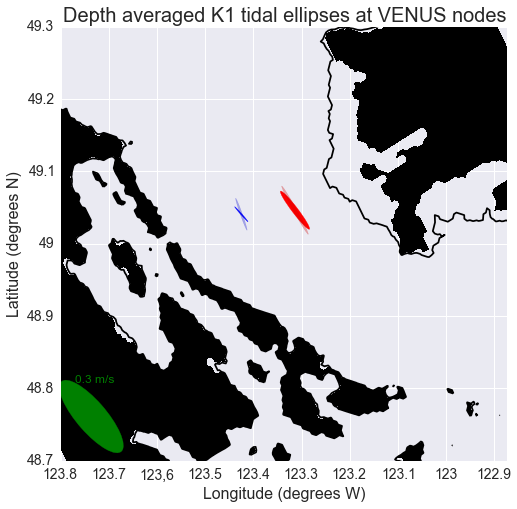

In [24]:
phi=29
k = np.zeros((898,398)); m = np.zeros((898,398))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
viz_tools.set_aspect(ax) 
ex = 90

#Inverted i and j to match code
sites = research_VENUS.SITES
ic = sites['VENUS']['Central']['i']
ie = sites['VENUS']['East']['i']
jc = sites['VENUS']['Central']['j']
je = sites['VENUS']['East']['j']


for i in np.arange(je-ex,jc+ex):
    for j in np.arange(ic-ex,ie+ex):
        k[i,j] = i*np.cos(phi*np.pi/180.)+j*np.sin(phi*np.pi/180.)
        m[i,j] = -i*np.sin(phi*np.pi/180.)+j*np.cos(phi*np.pi/180.) 
scale = 100

maj = [cen_av[0,4], node[0][4], east_av[0,4], node[1][4]]
mino = [cen_av[0,5], node[0][5], east_av[0,5], node[1][5]]
inc = [cen_av[0,6], node[0][6], east_av[0,6], node[1][6]]
loc = [(jc,ic),(jc,ic), (je,ie),(je,ie)]
intens = [1, 0.8, 1, 0.8]; opaque = [1,0.3,1,0.3]
label = ['Salish Sea Model', 'ADCP', 'd', 'sv']

for  maj, mino, inc, loc, intens, opaque, label in zip(maj, mino, inc, loc, intens, opaque, label):
    if mino > 0:
        thec = [0,0,1*intens, opaque]
    else:
        thec = [1*intens,0,0, opaque]
    ellsc = Ellipse(xy=(m[loc],k[loc]), width=scale*maj, 
                        height=scale*mino, angle=inc,
                        color=thec)
    ax.add_artist(ellsc)
    ellsc.set_facecolor(thec)
ell = Ellipse(xy=(m[395,190],k[395,190]),width = scale*0.3, height = scale*0.1, angle = -45,
              color='g')
ax.add_artist(ell)
textscale = ax.text(m[407,190],k[407,190], '0.3 m/s', color='g', fontsize=12)
# y-axis in k, but labelled in latitude
ax.set_ylim(480,490)
slope = (lats[jc,ic]-lats[je,ic])/(k[jc,ic]-k[je,ic])
mylist = (k[je,ic]+(np.arange(48.7, 49.35, 0.1)-
                           lats[je,ic])/slope).tolist()
labels = ['48.7','48.8', '48.9', '49', '49.1', '49.2', '49.3']
ax.set_yticks(mylist)
ax.set_yticklabels(labels)
ax.set_ylabel('Latitude (degrees N)', **axisfont)
# x-axis in m, but labelled in longitude
ax.set_xlim(100,120)
slope = (lons[je,ie]-lons[je,ic])/(m[je,ie]-m[je,ic])
mylist = (m[je,ic]+(np.arange(-123.8,-122.85,0.1)-
                        lons[je,ic])/slope).tolist()
labels = ['123.8','123.7','123,6','123.5','123.4','123.3', '123.2', '123.1', '123','122.9']
ax.set_xticks(mylist)
ax.set_xticklabels(labels)
ax.set_xlabel('Longitude (degrees W)', **axisfont)
ax.tick_params(axis='both', which='major', labelsize=14)


# land, and 5 m contour
contour_interval = [-0.01, 0.01]
ax.contourf(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],contour_interval,colors='black')
ax.contour(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],[5],colors='black')
ax.set_title('Depth averaged K1 tidal ellipses at VENUS nodes', **font)

print "red is clockwise"


##Surface comparisons with CODAR

red is clockwise


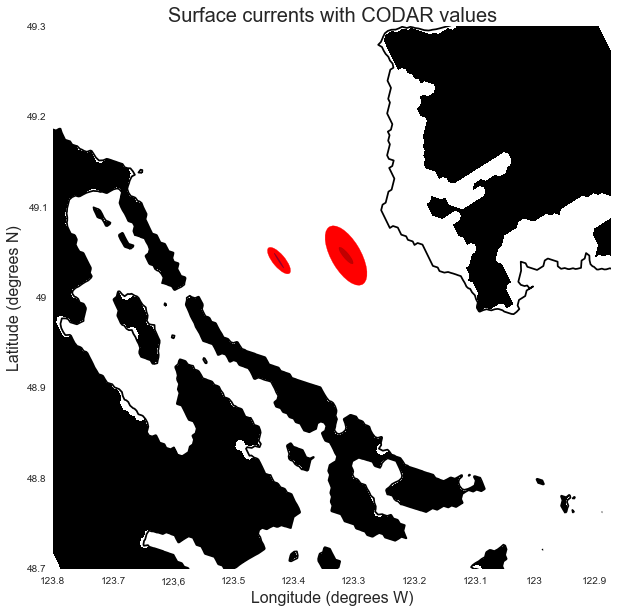

In [11]:
phi=29
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
viz_tools.set_aspect(ax) 
ex = 90

for i in np.arange(je-ex,jc+ex):
    for j in np.arange(ic-ex,ie+ex):
        k[i,j] = i*np.cos(phi*np.pi/180.)+j*np.sin(phi*np.pi/180.)
        m[i,j] = -i*np.sin(phi*np.pi/180.)+j*np.cos(phi*np.pi/180.) 
scale = 40
interval = 4

maj = [cen[0,1], codar[0][0], east[0,1], codar[1][0]]
mino = [cen[0,2], codar[0][1], east[0,2], codar[1][1]]
inc = [cen[0,3], codar[0][2], east[0,3], codar[1][2]]
loc = [(jc,ic),(jc,ic), (je,ie),(je,ie)]
intens = [1, 0.4, 1, 0.4]

for  maj, mino, inc, loc, intens in zip(maj, mino, inc, loc, intens):
#Making the ellipse for the Central node
    if mino > 0:
        thec = [0,0,1*intens, intens]
    else:
        thec = [1*intens,0,0, intens]
    ellsc = Ellipse(xy=(m[loc],k[loc]), width=scale*maj, 
                        height=scale*mino, angle=inc,
                        color=thec)
    ax.add_artist(ellsc)
    ellsc.set_facecolor(thec)
    
# y-axis in k, but labelled in latitude
ax.set_ylim(480,490)
slope = (lats[jc,ic]-lats[je,ic])/(k[jc,ic]-k[je,ic])
mylist = (k[je,ic]+(np.arange(48.7, 49.35, 0.1)-
                           lats[je,ic])/slope).tolist()
labels = ['48.7','48.8', '48.9', '49', '49.1', '49.2', '49.3']
ax.set_yticks(mylist)
ax.set_yticklabels(labels)
ax.set_ylabel('Latitude (degrees N)', **axisfont)
# x-axis in m, but labelled in longitude
ax.set_xlim(100,120)
slope = (lons[je,ie]-lons[je,ic])/(m[je,ie]-m[je,ic])
mylist = (m[je,ic]+(np.arange(-123.8,-122.85,0.1)-
                        lons[je,ic])/slope).tolist()
labels = ['123.8','123.7','123,6','123.5','123.4','123.3', '123.2', '123.1', '123','122.9']
ax.set_xticks(mylist)
ax.set_xticklabels(labels)
ax.set_xlabel('Longitude (degrees W)', **axisfont)


# land, and 5 m contour
contour_interval = [-0.01, 0.01]
ax.contourf(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],contour_interval,colors='black')
ax.contour(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],[5],colors='black')
ax.set_title('Surface currents with CODAR values', **font)

print "red is clockwise"

This seems like it is affected by the freshet. Let's take a look at this comparison but with data from November 26th 2014 to April 26th 2015

In [12]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 4, 26)

t_o = to.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()

runname1 = '{}_{}_{}_Central'.format(t_o, t_f, 'h')
runname2 = '{}_{}_{}_East'.format(t_o, t_f, 'h')

df1 = pd.read_csv('/ocean/mdunn/MEOPAR/analysis/Muriel/TidalEllipseData/Sensitivity/'+runname1+'.csv', index_col=False) 
df2 = pd.read_csv('/ocean/mdunn/MEOPAR/analysis/Muriel/TidalEllipseData/Sensitivity/'+runname2+'.csv', index_col=False)

cen_cod = df1.as_matrix()
east_cod = df2.as_matrix()

red is clockwise


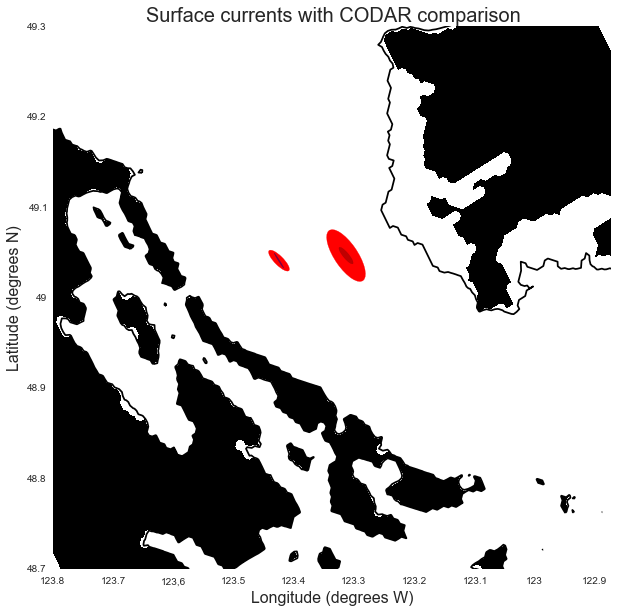

In [13]:
phi=29
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
viz_tools.set_aspect(ax) 
ex = 90

for i in np.arange(je-ex,jc+ex):
    for j in np.arange(ic-ex,ie+ex):
        k[i,j] = i*np.cos(phi*np.pi/180.)+j*np.sin(phi*np.pi/180.)
        m[i,j] = -i*np.sin(phi*np.pi/180.)+j*np.cos(phi*np.pi/180.) 
scale = 40
interval = 4
depth=0

maj = [cen_cod[0,1], codar[0][0], east_cod[0,1], codar[1][0]]
mino = [cen_cod[0,2], codar[0][1], east_cod[0,2], codar[1][1]]
inc = [cen_cod[0,3], codar[0][2], east_cod[0,3], codar[1][2]]
loc = [(jc,ic),(jc,ic), (je,ie),(je,ie)]
intens = [1, 0.5, 1, 0.5]

for  maj, mino, inc, loc, intens in zip(maj, mino, inc, loc, intens):
#Making the ellipse for the Central node
    if mino > 0:
        thec = [0,0,1*intens, intens]
    else:
        thec = [1*intens,0,0, intens]
    ellsc = Ellipse(xy=(m[loc],k[loc]), width=scale*maj, 
                        height=scale*mino, angle=inc,
                        color=thec)
    ax.add_artist(ellsc)
    ellsc.set_facecolor(thec)
    

# y-axis in k, but labelled in latitude
ax.set_ylim(480,490)
slope = (lats[jc,ic]-lats[je,ic])/(k[jc,ic]-k[je,ic])
mylist = (k[je,ic]+(np.arange(48.7, 49.35, 0.1)-
                           lats[je,ic])/slope).tolist()
labels = ['48.7','48.8', '48.9', '49', '49.1', '49.2', '49.3']
ax.set_yticks(mylist)
ax.set_yticklabels(labels)
ax.set_ylabel('Latitude (degrees N)', **axisfont)
# x-axis in m, but labelled in longitude
ax.set_xlim(100,120)
slope = (lons[je,ie]-lons[je,ic])/(m[je,ie]-m[je,ic])
mylist = (m[je,ic]+(np.arange(-123.8,-122.85,0.1)-
                        lons[je,ic])/slope).tolist()
labels = ['123.8','123.7','123,6','123.5','123.4','123.3', '123.2', '123.1', '123','122.9']
ax.set_xticks(mylist)
ax.set_xticklabels(labels)
ax.set_xlabel('Longitude (degrees W)', **axisfont)


# land, and 5 m contour
contour_interval = [-0.01, 0.01]
ax.contourf(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],contour_interval,colors='black')
ax.contour(m[je-ex:jc+ex,ic-ex:ie+ex],k[je-ex:jc+ex,ic-ex:ie+ex],
            bathy.data[je-ex:jc+ex,ic-ex:ie+ex],[5],colors='black')
ax.set_title('Surface currents with CODAR comparison', **font)

print "red is clockwise"

The freshet is not affectecting the surface currents as much as expected, they are just very large! 

In [14]:
print "Central   Major-Axis   Minor-Axis     Angle"
print "           (m/s)      (m/s)     (deg ccw E)"  
print ' Model      {0:.2f}       {1:5.2f}      {2:3.0f}   '.format( 
         cen_cod[0,1], cen_cod[0,2], cen_cod[0,3]) 
print ' CODAR      {0:.2f}       {1:5.2f}      {2:3.0f}   '.format(
         codar[0][0], codar[0][1], codar[0][2])


print "East   Major-Axis   Minor-Axis     Angle"
print "           (m/s)      (m/s)     (deg ccw E)"  
print ' Model      {0:.2f}       {1:5.2f}      {2:3.0f}   '.format( 
         east_cod[0,1], east_cod[0,2], east_cod[0,3]) 
print ' CODAR      {0:.2f}       {1:5.2f}      {2:3.0f}   '.format(
         codar[1][0], codar[1][1], codar[1][2])

Central   Major-Axis   Minor-Axis     Angle
           (m/s)      (m/s)     (deg ccw E)
 Model      0.19       -0.06      139   
 CODAR      0.11        0.01      126   
East   Major-Axis   Minor-Axis     Angle
           (m/s)      (m/s)     (deg ccw E)
 Model      0.39       -0.16      129   
 CODAR      0.14       -0.04      134   


##Depth profile comparison

For this comparison I will use ADCP data compiled by Rich Pawlovich and Mark Halverson at the ONC VENUS nodes.

In [15]:
eastobs = np.loadtxt('/ocean/mhalvers/research/adcp/east_ADCP_M2_ellipse_params.txt', skiprows=2, unpack=True)
central = np.loadtxt('/ocean/mhalvers/research/adcp/central_ADCP_M2_ellipse_params.txt', skiprows=2, unpack=True)

In [16]:
x = np.where(np.logical_and(cen[:,0] > central[0,1], cen[:,0] < central[0,-1]))
y = np.where(np.logical_and(east[:,0] > eastobs[0,1], east[:,0] < eastobs[0,-1]))

###Central node

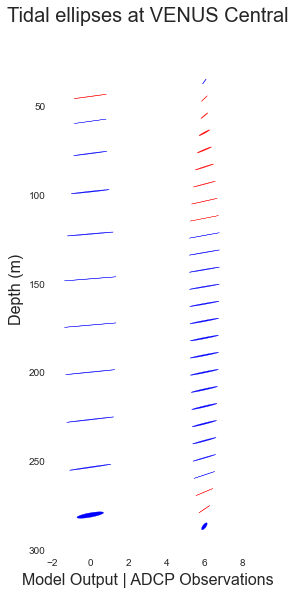

In [17]:
fig = plt.figure(figsize=(7.5,9.4))
ax = fig.add_subplot(121)
scale = 20
interval = 2

for ind, dep in zip(x[0],cen[x[0],0]):
    if cen[ind,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(0,dep), width=scale*cen[ind,1], 
                        height=scale*cen[ind,2], angle=cen[ind,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for ind, dep in zip(np.arange(0,(len(central[0,:])-1), interval), central[0,:][::interval]):
    if central[2,ind] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(6,dep), width=scale*central[1,ind]/100, 
                        height=scale*central[2,ind]/100, angle=central[3,ind],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
ax.set_ylim(5,300)
ax.invert_yaxis()
ax.set_xlim(-2,8)
ax.set_title('Tidal ellipses at VENUS Central', **font)
ax.set_ylabel('Depth (m)', **axisfont)
ax.set_xlabel('Model Output | ADCP Observations', **axisfont)

### East node

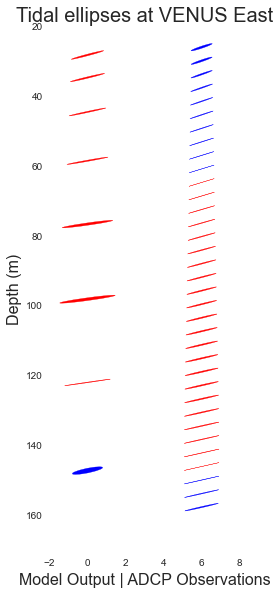

In [18]:
fig = plt.figure(figsize=(7.5,9.4))
ax = fig.add_subplot(121)
scale = 10
interval = 2

for ind, dep in zip(y[0],east[y[0],0]):
    if east[ind,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(0,dep), width=scale*east[ind,1], 
                        height=scale*east[ind,2], angle=east[ind,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for ind, dep in zip(np.arange(0,(len(eastobs[0,:])-1), interval), eastobs[0,:][::interval]):
    if eastobs[2,ind] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(6,dep), width=scale*eastobs[1,ind]/100, 
                        height=scale*eastobs[2,ind]/100, angle=eastobs[3,ind],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
ax.set_ylim(20,170)
ax.invert_yaxis()
ax.set_xlim(-2,8)
ax.set_title('Tidal ellipses at VENUS East', **font)
ax.set_ylabel('Depth (m)', **axisfont)
ax.set_xlabel('Model Output | ADCP Observations', **axisfont)

In [19]:
central[1:3,:] = central[1:3,:]/100
eastobs[1:3,:] = eastobs[1:3,:]/100

##Line plots
These will help represent the parameters in the plots above individually without having to look through a table

In [20]:
count = np.arange(0,2)
parameter = ['Major-axis', 'Minor-axis', 'Inclination', 'Phase']
unit = ['m/s','m/s','deg', 'deg']

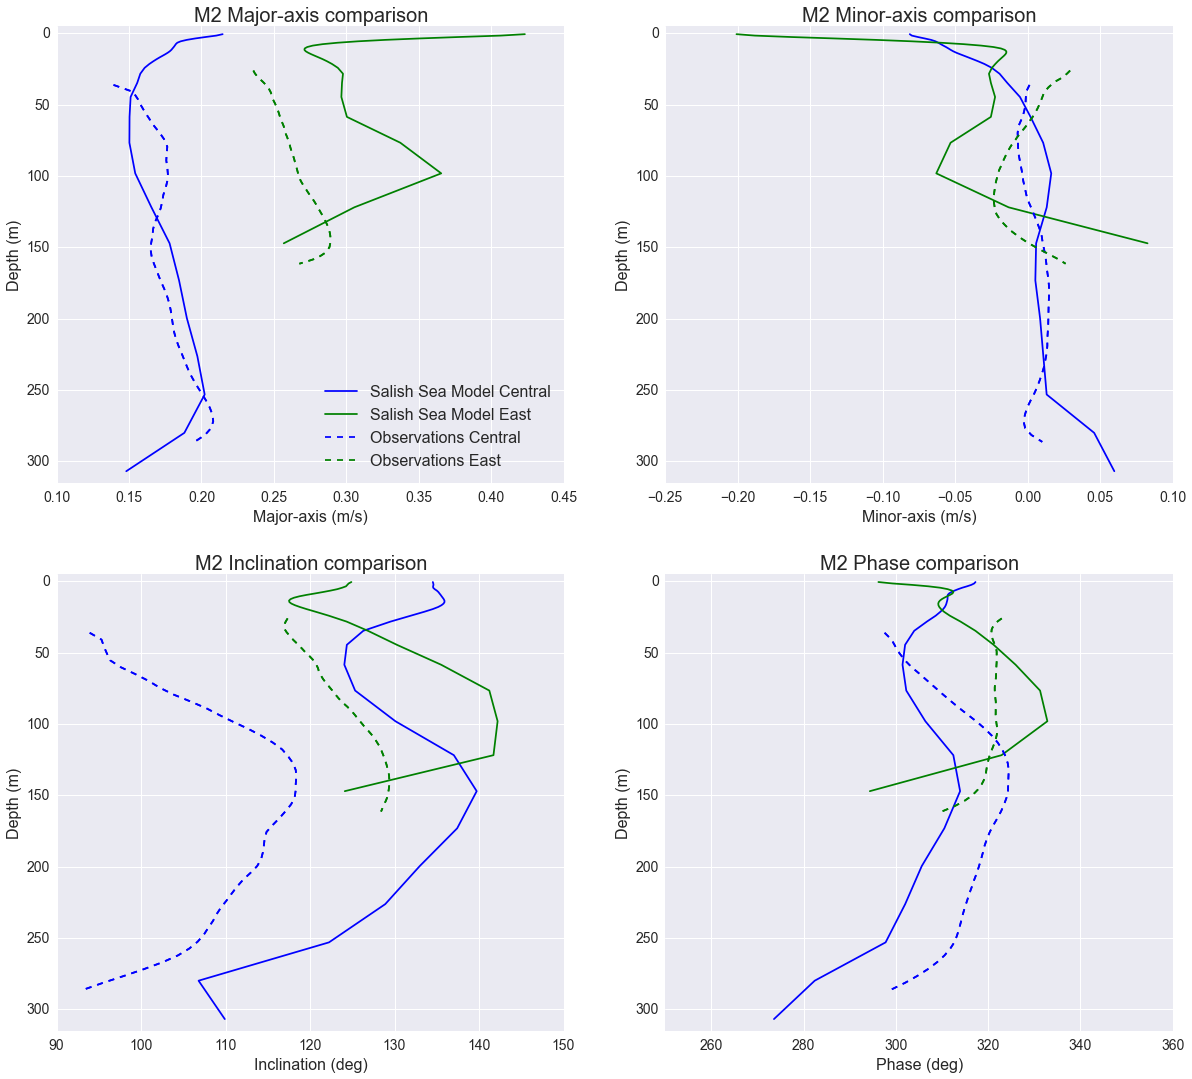

In [23]:
sn.set_style('darkgrid') 
fig, ([ax0, ax1],[ ax2, ax3])= plt.subplots(2,2,figsize=(20,18))

for ax , ind, par, u in zip([ax0, ax1, ax2, ax3], np.arange(1,5), parameter, unit):
    if ax ==ax3:
        ax.plot(cen[:-4,ind],cen[:-4,0], '-b', label='Salish Sea Model Central')
        ax.plot(east[:-10,ind], east[:-10,0], '-g', label='Salish Sea Model East')
        ax.plot(central[ind,:],central[0,:], '--b', label='Observations Central')
        ax.plot(eastobs[ind,:],eastobs[0,:], '--g', label='Observations East')
        ax.set_xlim([250, 360])
        ax.tick_params(axis='both', which='major', labelsize=14)
    else:
        ax.plot(cen[:-4,ind],cen[:-4,0], '-b', label='Salish Sea Model Central')
        ax.plot(east[:-10,ind], east[:-10,0],'-g', label='Salish Sea Model East')
        ax.plot(central[ind,:],central[0,:], '--b', label='Observations Central')
        ax.plot(eastobs[ind,:],eastobs[0,:], '--g', label='Observations East')
        ax.tick_params(axis='both', which='major', labelsize=14)
    ax.plot(central[ind,:],central[0,:], '--b')
    ax.plot(eastobs[ind,:],eastobs[0,:], '--g')

    ax.set_title('M2 {} comparison'.format(par), **font)
    ax.set_ylabel('Depth (m)',**axisfont)
    ax.set_xlabel('{} ({})'.format(par,u),**axisfont)
    ax.set_ylim([-5, 315])
    ax.invert_yaxis()
    
ax0.legend(loc=0, fontsize=16)

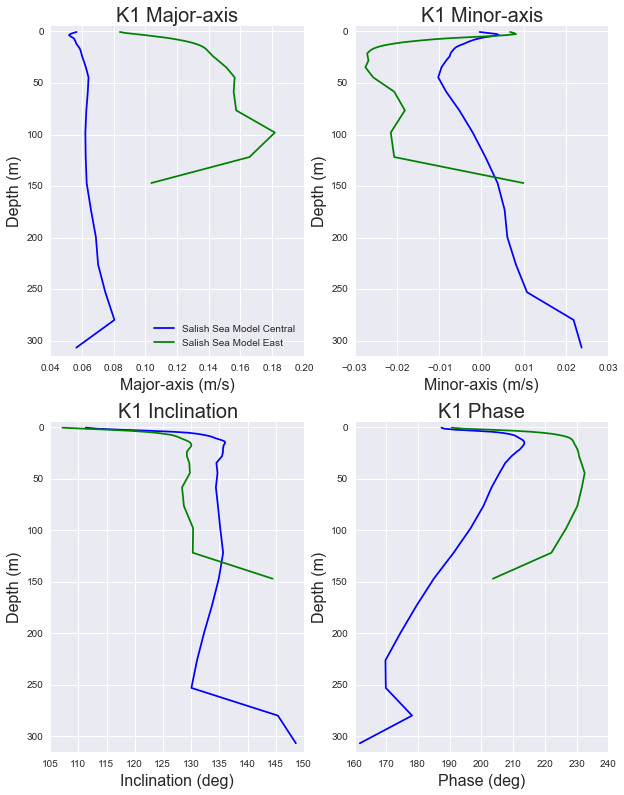

In [22]:
fig, ([ax0, ax1],[ ax2, ax3])= plt.subplots(2,2,figsize=(10,13))

for ax , ind, par, u in zip([ax0, ax1, ax2, ax3], np.arange(5,9), parameter, unit):
    ax.plot(cen[:-4,ind],cen[:-4,0], '-b', label='Salish Sea Model Central')
    ax.plot(east[:-10,ind], east[:-10,0],'-g', label='Salish Sea Model East')
    ax.set_title('K1 {}'.format(par), **font)
    ax.set_ylabel('Depth (m)', **axisfont)
    ax.set_xlabel('{} ({})'.format(par,u), **axisfont)
    ax.set_ylim([-5, 315])
    ax.invert_yaxis()
#ax3.set_xlim([0, 360])    
ax0.legend(loc=0)